In [15]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190500 entries, 0 to 190499
Columns: 178 entries, gender to breed_yorkshire terrier
dtypes: int64(178)
memory usage: 258.7 MB


# Random forest before PCA

In [ ]:
# Split data into features (X) and target (y)
X = df.drop(['yearly_final_cost'], axis=1)  
y = df['yearly_final_cost']  # Continuous target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Random Forest model on the original feature set (no PCA)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("### Model Performance Before PCA ###")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

# Save the Random Forest model and scaler before PCA
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
with open('train_rmse.pkl', 'wb') as f:
    pickle.dump(train_rmse, f)
with open('test_rmse.pkl', 'wb') as f:
    pickle.dump(test_rmse, f)
with open('train_mae.pkl', 'wb') as f:
    pickle.dump(train_mae, f)
with open('test_mae.pkl', 'wb') as f:
    pickle.dump(test_mae, f)
with open('train_r2.pkl', 'wb') as f:
    pickle.dump(train_r2, f)
with open('test_r2.pkl', 'wb') as f:
    pickle.dump(test_r2, f)

In [4]:
# Loading the models and scaler for later use
with open('rf_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
with open('train_rmse.pkl', 'rb') as f:
    train_rmse = pickle.load(f)
with open('test_rmse.pkl', 'rb') as f:
    test_rmse = pickle.load(f)
with open('train_mae.pkl', 'rb') as f:
    train_mae = pickle.load(f)
with open('test_mae.pkl', 'rb') as f:
    test_mae = pickle.load(f)
with open('train_r2.pkl', 'rb') as f:
    train_r2 = pickle.load(f)
with open('test_r2.pkl', 'rb') as f:
    test_r2 = pickle.load(f)
    
# Print the loaded performance metrics
print("### Loaded Model Performance Before PCA ###")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

### Loaded Model Performance Before PCA ###
Train RMSE: 0.9759639474081109
Test RMSE: 1.220350026161229
Train MAE: 0.02736423884514441
Test MAE: 0.0490501312335959
Train R2: 0.9999979958977231
Test R2: 0.9999968016225496


# Feature performance before PCA

In [ ]:
X = df.drop(['yearly_final_cost'], axis=1)  # Features excluding the target
y = df['yearly_final_cost']  # Continuous target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Random Forest model on the original feature set (no PCA)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance analysis before PCA
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("### Feature Importances Before PCA ###")
print(importance_df.head(50))  # Display top 50 features

# Save feature importances before PCA
with open('feature_importances_before_pca.pkl', 'wb') as f:
    pickle.dump(importance_df, f)

In [5]:
# Load the feature importances before PCA
with open('feature_importances_before_pca.pkl', 'rb') as f:
    loaded_feature_importances_before_pca = pickle.load(f)

# Display the loaded feature importances
print("### Loaded Feature Importances Before PCA ###")
print(loaded_feature_importances_before_pca.head(50)) 

### Loaded Feature Importances Before PCA ###
                              feature  importance
3                                size    0.478174
16                       kid_friendly    0.176870
17                       dog_friendly    0.117441
18                  stranger_friendly    0.106652
19           potential_for_mouthiness    0.020753
11              intelligence_category    0.014236
75                 breed_bull terrier    0.012562
20                         prey_drive    0.012536
166  breed_staffordshire bull terrier    0.010565
45                            thyroid    0.008064
23                     exercise_needs    0.006983
2                           longevity    0.005438
47                     severity_score    0.004390
24                       energy_level    0.003111
44                              spine    0.001977
15              tolerates_hot_weather    0.001694
5                    category_herding    0.001584
21           tendency_to_bark_or_howl    0.001193
31  

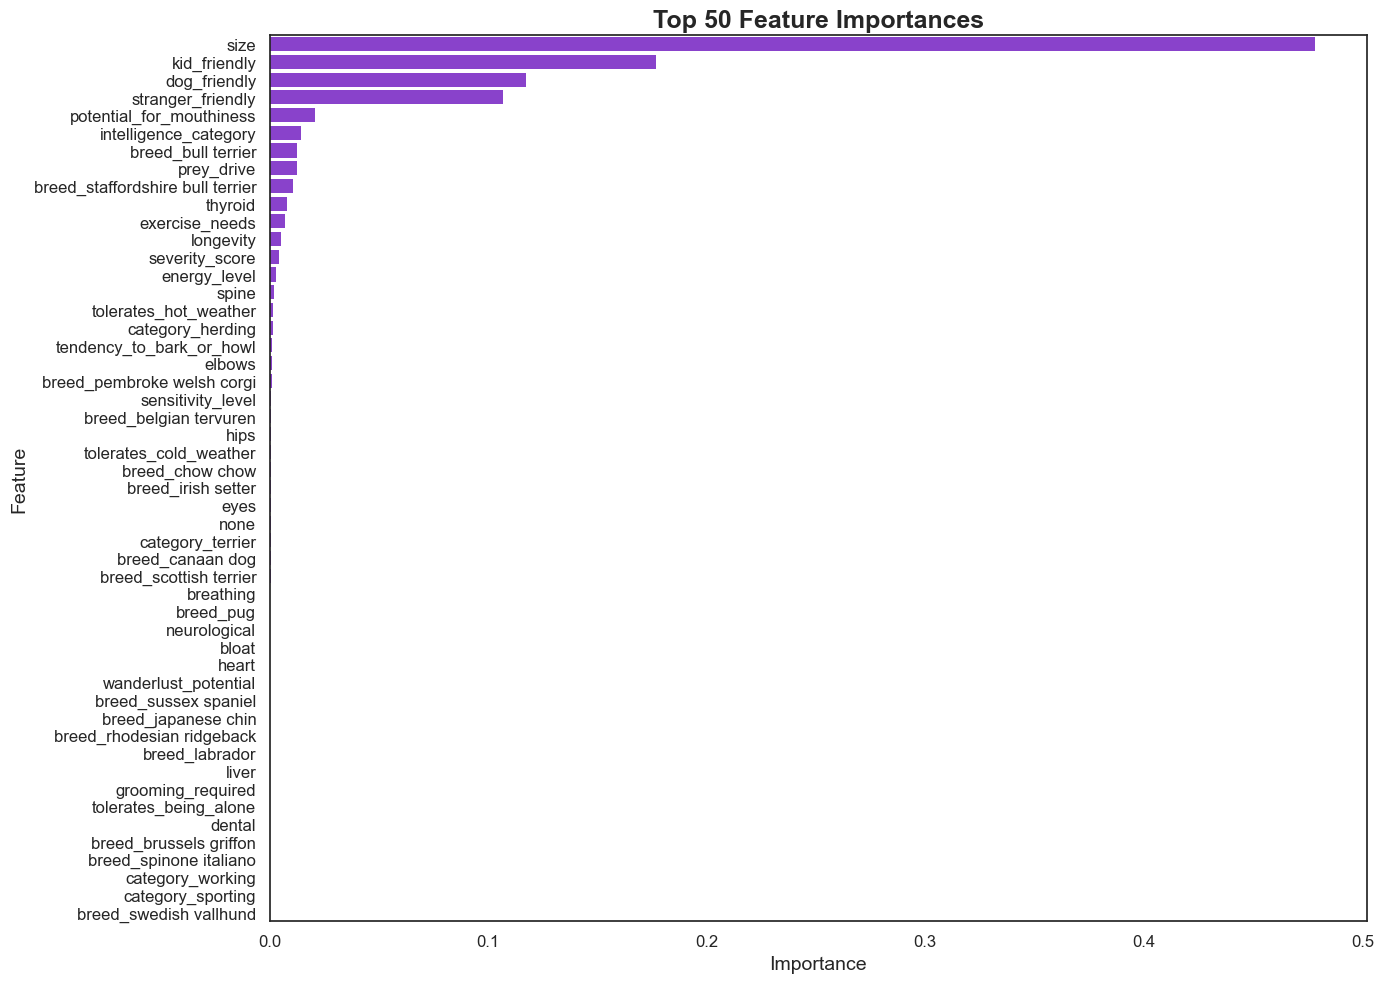

In [22]:
# Load the feature importances before PCA
with open('feature_importances_before_pca.pkl', 'rb') as f:
    loaded_feature_importances_before_pca = pickle.load(f)

# Plotting top 50 feature importances
top_50_features = loaded_feature_importances_before_pca.head(50)

# Define color
light_violet = '#8A2BE2'  

# Set the style and context for better readability
sns.set(style="white")
plt.figure(figsize=(14, 10))

# Create the barplot
ax = sns.barplot(
    x='importance', 
    y='feature', 
    data=loaded_feature_importances_before_pca.head(50), 
    color=light_violet,
    edgecolor='none'
)
# Customize the plot
ax.set_title('Top 50 Feature Importances', fontsize=18, fontweight='bold')
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the layout
plt.tight_layout()

# Save the plot if needed
#plt.savefig('top_50_feature_importances.png', dpi=300)

# Show the plot
plt.show()

# Random forest after PCA

In [19]:
from sklearn.decomposition import PCA

X = df.drop(['yearly_final_cost'], axis=1)  
y = df['yearly_final_cost']  # Continuous target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit a Random Forest model on the PCA-transformed feature set
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_train_pca = rf_pca.predict(X_train_pca)
y_pred_test_pca = rf_pca.predict(X_test_pca)

train_rmse_pca = mean_squared_error(y_train, y_pred_train_pca, squared=False)
test_rmse_pca = mean_squared_error(y_test, y_pred_test_pca, squared=False)
train_mae_pca = mean_absolute_error(y_train, y_pred_train_pca)
test_mae_pca = mean_absolute_error(y_test, y_pred_test_pca)
train_r2_pca = r2_score(y_train, y_pred_train_pca)
test_r2_pca = r2_score(y_test, y_pred_test_pca)

print("### Model Performance After PCA ###")
print("Train RMSE:", train_rmse_pca)
print("Test RMSE:", test_rmse_pca)
print("Train MAE:", train_mae_pca)
print("Test MAE:", test_mae_pca)
print("Train R2:", train_r2_pca)
print("Test R2:", test_r2_pca)

# Save the Random Forest model and PCA transformer
with open('rf_model_pca.pkl', 'wb') as f:
    pickle.dump(rf_pca, f)
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)
with open('X_train_pca.pkl', 'wb') as f:
    pickle.dump(X_train_pca, f)
with open('X_test_pca.pkl', 'wb') as f:
    pickle.dump(X_test_pca, f)
with open('train_rmse_pca.pkl', 'wb') as f:
    pickle.dump(train_rmse_pca, f)
with open('test_rmse_pca.pkl', 'wb') as f:
    pickle.dump(test_rmse_pca, f)
with open('train_mae_pca.pkl', 'wb') as f:
    pickle.dump(train_mae_pca, f)
with open('test_mae_pca.pkl', 'wb') as f:
    pickle.dump(test_mae_pca, f)
with open('train_r2_pca.pkl', 'wb') as f:
    pickle.dump(train_r2_pca, f)
with open('test_r2_pca.pkl', 'wb') as f:
    pickle.dump(test_r2_pca, f)

C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Performance After PCA ###
Train RMSE: 2.692884150235194
Test RMSE: 6.6682551698700525
Train MAE: 0.1446847112860892
Test MAE: 0.38157244094488185
Train R2: 0.9999847423491678
Test R2: 0.999904503972491


In [23]:
# Load the Random Forest model and PCA transformer after PCA
with open('rf_model_pca.pkl', 'rb') as f:
    rf_pca = pickle.load(f)
with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)
with open('X_train_pca.pkl', 'rb') as f:
    X_train_pca = pickle.load(f)
with open('X_test_pca.pkl', 'rb') as f:
    X_test_pca = pickle.load(f)
with open('train_rmse_pca.pkl', 'rb') as f:
    train_rmse_pca = pickle.load(f)
with open('test_rmse_pca.pkl', 'rb') as f:
    test_rmse_pca = pickle.load(f)
with open('train_mae_pca.pkl', 'rb') as f:
    train_mae_pca = pickle.load(f)
with open('test_mae_pca.pkl', 'rb') as f:
    test_mae_pca = pickle.load(f)
with open('train_r2_pca.pkl', 'rb') as f:
    train_r2_pca = pickle.load(f)
with open('test_r2_pca.pkl', 'rb') as f:
    test_r2_pca = pickle.load(f)

# Output the loaded metrics
print("### Loaded Model Performance After PCA ###")
print("Train RMSE:", train_rmse_pca)
print("Test RMSE:", test_rmse_pca)
print("Train MAE:", train_mae_pca)
print("Test MAE:", test_mae_pca)
print("Train R2:", train_r2_pca)
print("Test R2:", test_r2_pca)

### Loaded Model Performance After PCA ###
Train RMSE: 2.692884150235194
Test RMSE: 6.6682551698700525
Train MAE: 0.1446847112860892
Test MAE: 0.38157244094488185
Train R2: 0.9999847423491678
Test R2: 0.999904503972491


# Feature importance after PCA

In [21]:
# Feature importance in PCA space
feature_importances_pca = rf_pca.feature_importances_

# Convert PCA feature importances to original feature space
# The principal components matrix pca.components_ can be used to map back to original features
pca_components = pca.components_
feature_importances_original = np.abs(pca_components.T @ feature_importances_pca)

# Create a DataFrame to visualize the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_original
}).sort_values(by='Importance', ascending=False)

print("### Feature Importance in Original Feature Space ###")
print(importance_df)

# Save feature importance in original space
with open('feature_importances_original.pkl', 'wb') as f:
    pickle.dump(importance_df, f)

### Feature Importance in Original Feature Space ###
                           Feature    Importance
20                      prey_drive  1.046927e-01
22            wanderlust_potential  9.351621e-02
23                  exercise_needs  8.938570e-02
6                   category_hound  8.921616e-02
3                             size  8.435995e-02
..                             ...           ...
132               breed_mix medium  7.618550e-04
77             breed_cairn terrier  5.437440e-04
131                breed_mix large  4.387417e-04
146  breed_polish lowland sheepdog  9.762426e-05
29                    cleft_palate  4.837581e-18

[177 rows x 2 columns]


In [24]:
# Load feature importance DataFrame
with open('feature_importances_original.pkl', 'rb') as f:
    importance_df = pickle.load(f)

print("### Loaded Feature Importance in Original Feature Space ###")
print(importance_df)

### Loaded Feature Importance in Original Feature Space ###
                           Feature    Importance
20                      prey_drive  1.046927e-01
22            wanderlust_potential  9.351621e-02
23                  exercise_needs  8.938570e-02
6                   category_hound  8.921616e-02
3                             size  8.435995e-02
..                             ...           ...
132               breed_mix medium  7.618550e-04
77             breed_cairn terrier  5.437440e-04
131                breed_mix large  4.387417e-04
146  breed_polish lowland sheepdog  9.762426e-05
29                    cleft_palate  4.837581e-18

[177 rows x 2 columns]


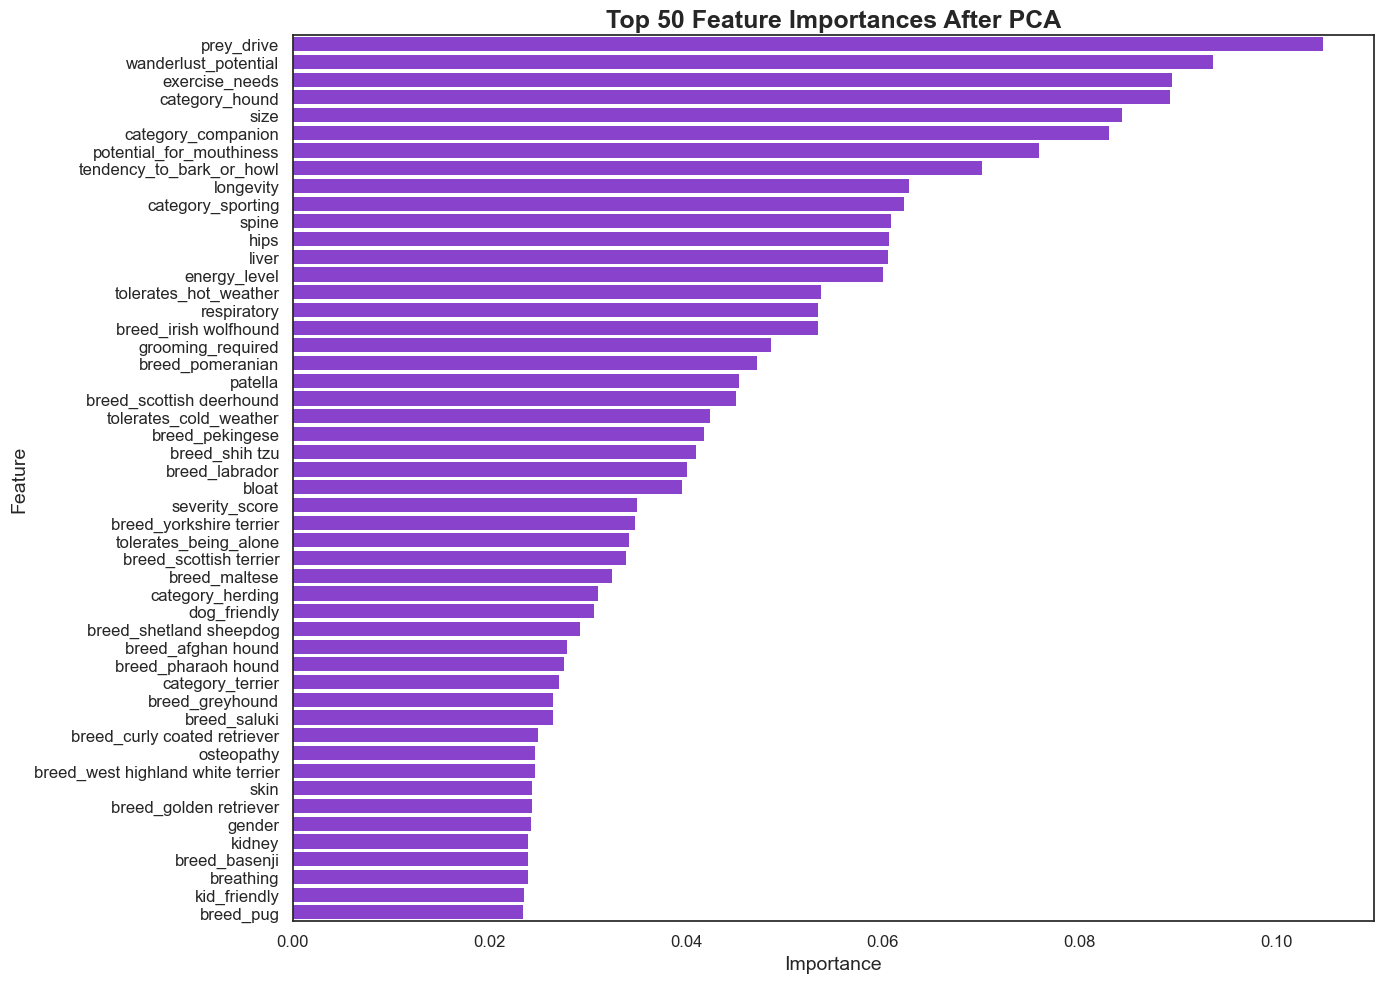

In [27]:
# Load the feature importances after PCA
with open('feature_importances_original.pkl', 'rb') as f:
    importance_df = pickle.load(f)

# Set up the color and style
light_violet = '#8A2BE2'  # Light violet color
sns.set(style="white")

# Create a DataFrame for plotting
top_50_features = loaded_feature_importances_original.head(50)

# Set up the plot
plt.figure(figsize=(14, 10))

# Create the barplot
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=top_50_features,
    color=light_violet,
    edgecolor='none'
)

# Customize the plot
ax.set_title('Top 50 Feature Importances After PCA', fontsize=18, fontweight='bold')
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the layout
plt.tight_layout()

# Save the plot
#plt.savefig('top_50_feature_importances_after_pca_light_violet.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
# there is a performance degradation after PCA, with higher RMSE and MAE, and lower R² values. 
#This indicates that PCA is negatively impacting model performance.

# Explained variance vs Number of principal components

In [ ]:
# Review PCA Components
# Determine the explained variance
from sklearn.pipeline import Pipeline

pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a pipeline with PCA and RandomForestRegressor
pipeline = Pipeline([
    ('pca', pca),
    ('rf', RandomForestRegressor(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Save PCA object, explained variance ratios, and cumulative variance ratios
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

with open('explained_variance_ratio.pkl', 'wb') as f:
    pickle.dump(explained_variance_ratio, f)

with open('cumulative_variance_ratio.pkl', 'wb') as f:
    pickle.dump(cumulative_variance_ratio, f)

# Save the number of components needed to explain 95% of the variance
num_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
with open('num_components_95.pkl', 'wb') as f:
    pickle.dump(num_components_95, f)

print(f'Number of components that explain 95% of the variance: {num_components_95}')

Number of components that explain 95% of the variance: 121


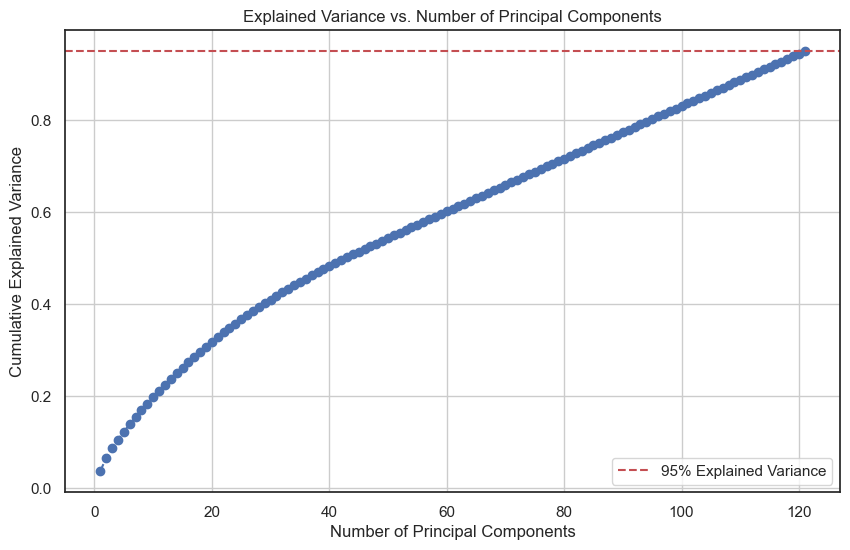

In [31]:
# Load the saved PCA object and variance ratios
with open('pca_model.pkl', 'rb') as f:
    pca = pickle.load(f)

with open('explained_variance_ratio.pkl', 'rb') as f:
    explained_variance_ratio = pickle.load(f)

with open('cumulative_variance_ratio.pkl', 'rb') as f:
    cumulative_variance_ratio = pickle.load(f)

with open('num_components_95.pkl', 'rb') as f:
    num_components_95 = pickle.load(f)

# Display the number of components that explain 95% of the variance
print(f'Number of components that explain 95% of the variance: {num_components_95}')

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid(True)


# Save the plot
#plt.savefig('Explained_Variance_Number_Principal_Components.png', dpi=300)

plt.show()

In [24]:
# Check different variance thresholds for PCA to see if they impact the model performance
# Data preparation
X = df.drop(['yearly_final_cost'], axis=1)
y = df['yearly_final_cost']  # Continuous target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experiment with different PCA components
for threshold in [0.90, 0.85, 0.80]:  # Different variance thresholds
    # Apply PCA
    pca = PCA(n_components=threshold)
    X_pca = pca.fit_transform(X_scaled)
    
    # Split PCA-transformed data
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Fit Random Forest model
    rf_pca = RandomForestRegressor(random_state=42)
    rf_pca.fit(X_train_pca, y_train)
    
    # Predict and evaluate
    y_pred_train_pca = rf_pca.predict(X_train_pca)
    y_pred_test_pca = rf_pca.predict(X_test_pca)
    
    train_rmse_pca = mean_squared_error(y_train, y_pred_train_pca, squared=False)
    test_rmse_pca = mean_squared_error(y_test, y_pred_test_pca, squared=False)
    train_mae_pca = mean_absolute_error(y_train, y_pred_train_pca)
    test_mae_pca = mean_absolute_error(y_test, y_pred_test_pca)
    train_r2_pca = r2_score(y_train, y_pred_train_pca)
    test_r2_pca = r2_score(y_test, y_pred_test_pca)
    
    # Feature importance in PCA space
    feature_importances_pca = rf_pca.feature_importances_
    
    # Convert PCA feature importances to original feature space
    pca_components = pca.components_
    feature_importances_original = np.abs(pca_components.T @ feature_importances_pca)
    
    # Create a DataFrame to visualize the feature importances
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances_original
    }).sort_values(by='Importance', ascending=False)
    
    # Save metrics and importance for each threshold
    metrics = {
        'train_rmse': train_rmse_pca,
        'test_rmse': test_rmse_pca,
        'train_mae': train_mae_pca,
        'test_mae': test_mae_pca,
        'train_r2': train_r2_pca,
        'test_r2': test_r2_pca
    }
    
    with open(f'metrics_pca_{int(threshold*100)}.pkl', 'wb') as f:
        pickle.dump(metrics, f)
    
    importance_df.to_pickle(f'feature_importances_pca_{int(threshold*100)}.pkl')

    print(f"\n### PCA with {threshold*100}% Variance Threshold ###")
    print(f"Train RMSE: {train_rmse_pca}")
    print(f"Test RMSE: {test_rmse_pca}")
    print(f"Train MAE: {train_mae_pca}")
    print(f"Test MAE: {test_mae_pca}")
    print(f"Train R2: {train_r2_pca}")
    print(f"Test R2: {test_r2_pca}")
    print("Top Features After PCA:")
    print(importance_df.head(10))

C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



### PCA with 90.0% Variance Threshold ###
Train RMSE: 2.7318677650216348
Test RMSE: 6.80308857351627
Train MAE: 0.14684133858267714
Test MAE: 0.39470629921259853
Train R2: 0.9999842973959822
Test R2: 0.9999006030322173
Top Features After PCA:
                     Feature  Importance
20                prey_drive    0.105095
22      wanderlust_potential    0.093981
23            exercise_needs    0.089923
6             category_hound    0.089609
4         category_companion    0.083959
3                       size    0.083733
19  potential_for_mouthiness    0.075135
21  tendency_to_bark_or_howl    0.069945
2                  longevity    0.061893
7          category_sporting    0.061769


C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



### PCA with 85.0% Variance Threshold ###
Train RMSE: 2.690077005942443
Test RMSE: 6.71826439396304
Train MAE: 0.14441496062992132
Test MAE: 0.3884493438320211
Train R2: 0.9999847741426658
Test R2: 0.9999030662380424
Top Features After PCA:
                     Feature  Importance
20                prey_drive    0.105780
22      wanderlust_potential    0.094860
23            exercise_needs    0.090286
6             category_hound    0.090184
4         category_companion    0.084826
3                       size    0.084719
19  potential_for_mouthiness    0.075174
21  tendency_to_bark_or_howl    0.069339
2                  longevity    0.063106
7          category_sporting    0.061818

### PCA with 80.0% Variance Threshold ###
Train RMSE: 2.6667837947127966
Test RMSE: 7.233013082524359
Train MAE: 0.14387696850393705
Test MAE: 0.40267506561679794
Train R2: 0.9999850366805967
Test R2: 0.9998876431935809
Top Features After PCA:
                     Feature  Importance
20                pre

C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vero\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Applying PCA has led to a significant increase in both RMSE and MAE, with a decrease in R2 for both training and test datasets.
#This indicates that PCA is reducing the model's ability to predict accurately compared to the model before PCA.
#Using a higher variance threshold (90.0% vs. 85.0%) results in slightly worse performance, as seen in the increase in RMSE 
#and MAE. This suggests that retaining a larger proportion of variance (90%) still captures a lot of the noise or irrelevant 
#variance, impacting the model's performance.

In [32]:
# Load and display metrics and feature importances
thresholds = [90, 85, 80]

for threshold in thresholds:
    # Load metrics
    with open(f'metrics_pca_{threshold}.pkl', 'rb') as f:
        metrics = pickle.load(f)
    
    # Load feature importances
    importance_df = pd.read_pickle(f'feature_importances_pca_{threshold}.pkl')
    
    print(f"\n### Loaded Metrics for PCA with {threshold}% Variance Threshold ###")
    print(f"Train RMSE: {metrics['train_rmse']}")
    print(f"Test RMSE: {metrics['test_rmse']}")
    print(f"Train MAE: {metrics['train_mae']}")
    print(f"Test MAE: {metrics['test_mae']}")
    print(f"Train R2: {metrics['train_r2']}")
    print(f"Test R2: {metrics['test_r2']}")
    
    print("Top Features After PCA:")
    print(importance_df.head(10))


### Loaded Metrics for PCA with 90% Variance Threshold ###
Train RMSE: 2.7318677650216348
Test RMSE: 6.80308857351627
Train MAE: 0.14684133858267714
Test MAE: 0.39470629921259853
Train R2: 0.9999842973959822
Test R2: 0.9999006030322173
Top Features After PCA:
                     Feature  Importance
20                prey_drive    0.105095
22      wanderlust_potential    0.093981
23            exercise_needs    0.089923
6             category_hound    0.089609
4         category_companion    0.083959
3                       size    0.083733
19  potential_for_mouthiness    0.075135
21  tendency_to_bark_or_howl    0.069945
2                  longevity    0.061893
7          category_sporting    0.061769

### Loaded Metrics for PCA with 85% Variance Threshold ###
Train RMSE: 2.690077005942443
Test RMSE: 6.71826439396304
Train MAE: 0.14441496062992132
Test MAE: 0.3884493438320211
Train R2: 0.9999847741426658
Test R2: 0.9999030662380424
Top Features After PCA:
                     Feature 